In [1]:
#importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargar data set de los datos a estudiar en la fase en curso 

data = pd.read_csv(r'D:\Adriana Lucia\Materias (8Semestre)\Analisis de datos\algoritmo de aprendizaje no supervisado\Mall_Customers.csv')


In [3]:
#mostrar los datos que se encuentran en el dataset 
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
data.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#ver la informacion general  sobre el data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#descripcion de las tablas 
data.describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#verificar que los vcalores de las eqtiquetas esten en el formato solicitado y no esten null 
data.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

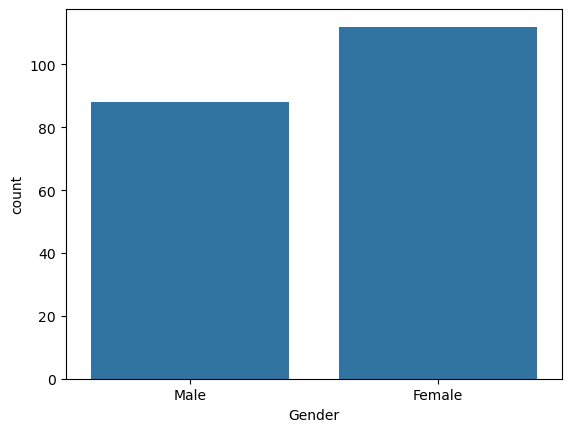

In [8]:
#visualizar la distribucion de 'Gender' 
sns.countplot(data=data, x='Gender')
plt.show()

In [9]:
#convertir los datos tipo object a tipo num 
data['Gender'] = data ['Gender'].map({'Female': 0, 'Male':1}) 

In [10]:
data.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
#eliminar etiqueta del data set irrelevante para el analsisis 
data= data.drop('CustomerID', axis=1) 

In [12]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


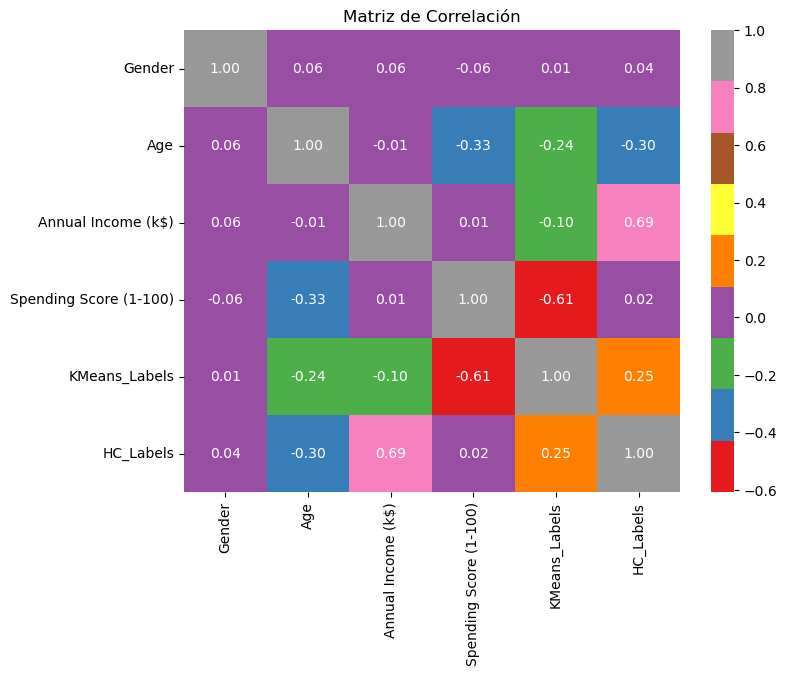

In [73]:
#correlación para las variables numericas 
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, cmap = "Set1", fmt= ".2f")
plt.title("Matriz de Correlación")
plt.show() 

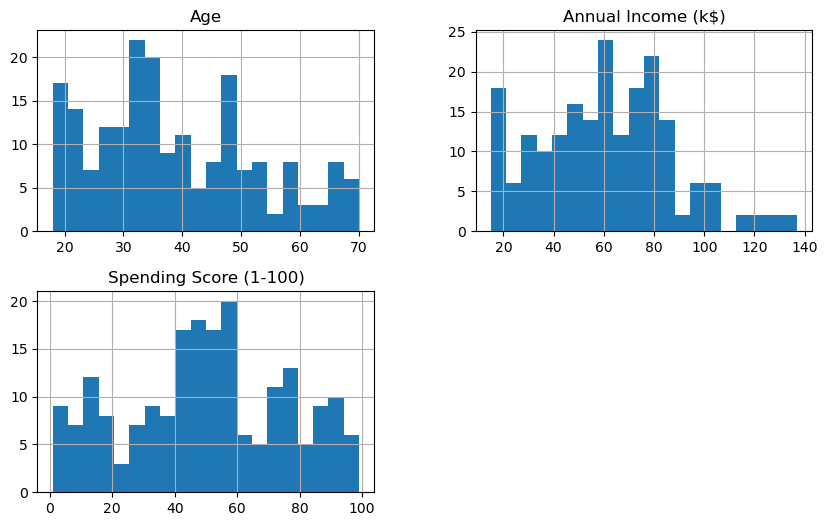

In [14]:
# histograma para las variables numéricas 
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins =20, figsize=( 10,6)) 
plt.show()


In [15]:
#normalizar las caracteristicas numericas 
from sklearn.preprocessing import StandardScaler 

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']] ) 
#convertir el dataframe para faciliatr el manejo 
data_scaled = pd.DataFrame(data_scaled, columns =['Age','Annual Income (k$)','Spending Score (1-100)'])

In [17]:
#creacion del modelo de clustering 
from sklearn.decomposition import PCA 


In [18]:
#realizar PCA para reducir la dimensionalidad 
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled) 

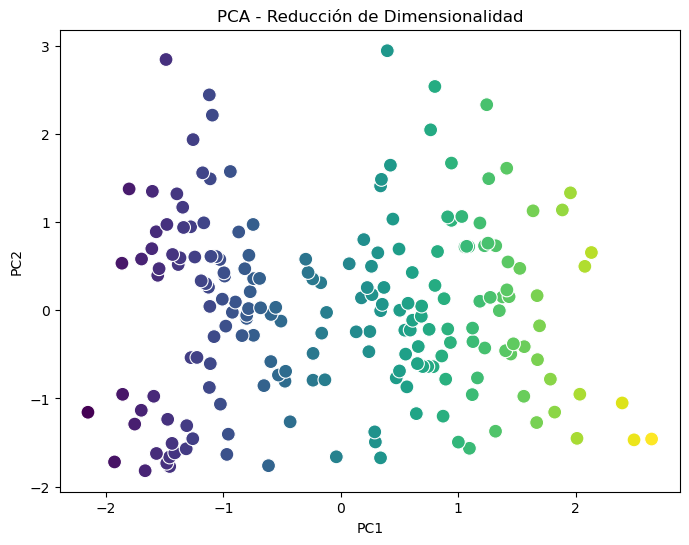

In [28]:
#visualizar los dos  primeras componentes 
data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=data_pca, hue='PC1', palette='viridis', s=100, legend=None)  
plt.title("PCA - Reducción de Dimensionalidad")
plt.show()


In [20]:
#importar liberias  para el entrenamiento
from sklearn.cluster  import KMeans 


In [21]:
#se entrena el modelo de k-means provando varios valores  de k 
from sklearn import metrics 


In [22]:
# evita que se muestren las advertencias en la consola
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [23]:
silhouette_scores = []
# probar el modelo con algunos valores de k 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  
# empezar a entrenar el modelo con los datos escalados
    silhouette_scores.append(metrics.silhouette_score(data_scaled, kmeans.labels_)) 
print(silhouette_scores)

[0.33547192894004574, 0.3579234303882264, 0.4039582785148566, 0.40846873777345605, 0.43106526216603014, 0.410091114520974, 0.3673663165322295, 0.37442148555078425, 0.36186970479722974]


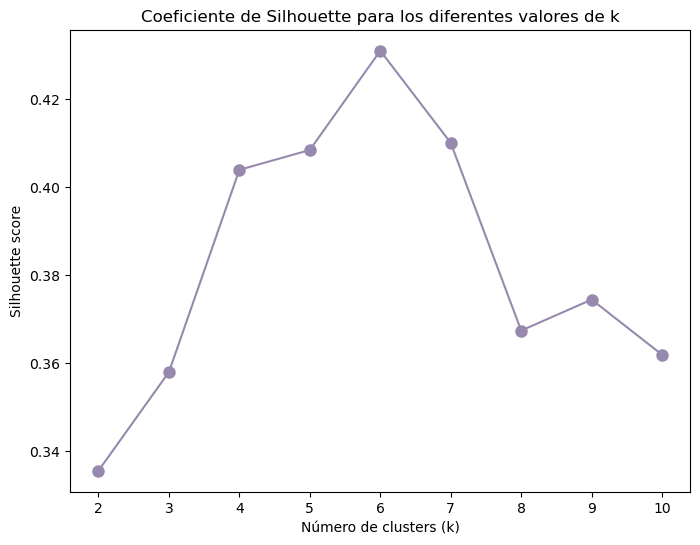

In [24]:
#graficar los diferentes coeficientes de silhouette para elegir el que mejor se adapte a k 
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), silhouette_scores, marker='o',color='#9789ae', linestyle='-', markersize=8)  
plt.title("Coeficiente de Silhouette para los diferentes valores de k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")  
plt.show()

In [25]:
#seleccionamos el k mas alto, en este caso 6 
best_k = 6

In [26]:
#para entrenar el modelo debemos seleccionar el mejor valor k (6) 
kmeans = KMeans(n_clusters = best_k, random_state =42)
kmeans_labels = kmeans.fit_predict (data_scaled)
data['KMeans_Labels'] = kmeans_labels

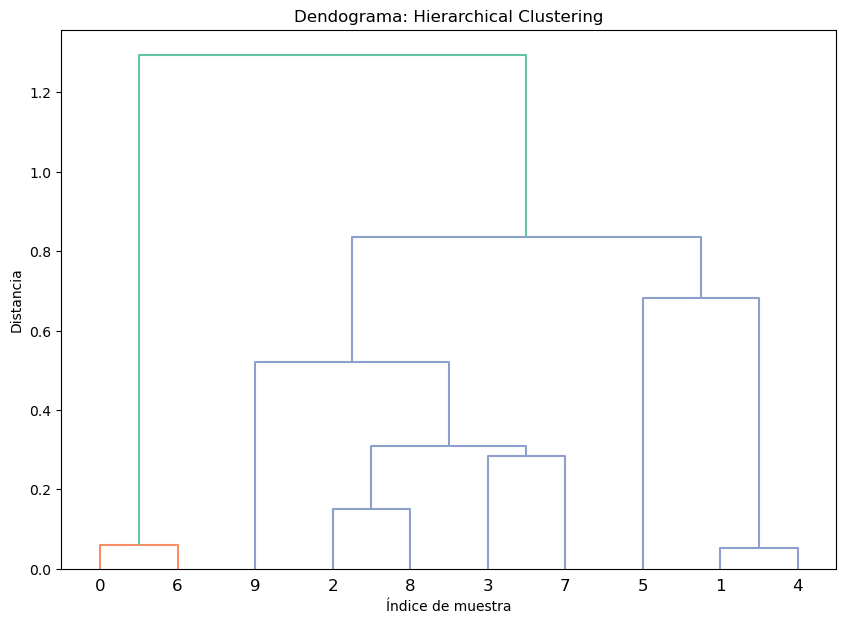

In [74]:

#generar el grafico de dendrograma para para visualizar los posibles numeros de clusters 
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))  # Corregido el paréntesis
dendrogram(linked)
plt.title("Dendograma: Hierarchical Clustering")
plt.xlabel("Índice de muestra")
plt.ylabel("Distancia")
plt.show()



In [29]:
#Modelo de Hierarchical Clustering
#se importan las librerías necesarias 
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering


In [30]:
#despues de analizar el resultado de la grafica, se selecciona el numero de clusters; en este caso=8
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_scaled)

In [31]:
#se añaden etiquetas al dataframe original  para visualizar y analizar 
data['HC_Labels'] = hc_labels

In [32]:
#evaluar los 2 modelos
#k-means
silhouette_kmeans = metrics.silhouette_score(data_scaled, kmeans_labels)
calinski_kmeans = metrics.calinski_harabasz_score(data_scaled,kmeans_labels)
print(f"Coeficiente de Silhoutte k-means: (silhouette_kmeans]") 
print(f"Indice de Calinski-Harabasz k-means: (calinski_kmeans]") 

Coeficiente de Silhoutte k-means: (silhouette_kmeans]
Indice de Calinski-Harabasz k-means: (calinski_kmeans]


In [33]:
#Hierarchical Clustering 
silhouette_hc = metrics.silhouette_score(data_scaled, hc_labels)
calinski_hc = metrics.calinski_harabasz_score(data_scaled,hc_labels)
print(f"Coeficiente de Silhoutte Hierarchical Clustering : (silhouette_hc]") 
print(f"Indice de Calinski-Harabasz Hierarchical Clustering : (calinski_hc]") 

Coeficiente de Silhoutte Hierarchical Clustering : (silhouette_hc]
Indice de Calinski-Harabasz Hierarchical Clustering : (calinski_hc]


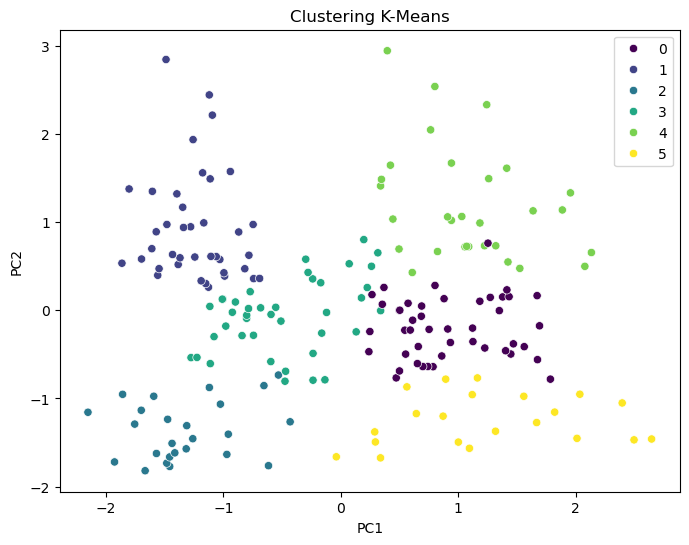

In [34]:
#visualizar los resultados de k-means 
plt.figure(figsize =(8,6))
sns.scatterplot(x='PC1', y='PC2', hue =kmeans_labels, palette = 'viridis', data = data_pca)
plt.title("Clustering K-Means")
plt.show() 

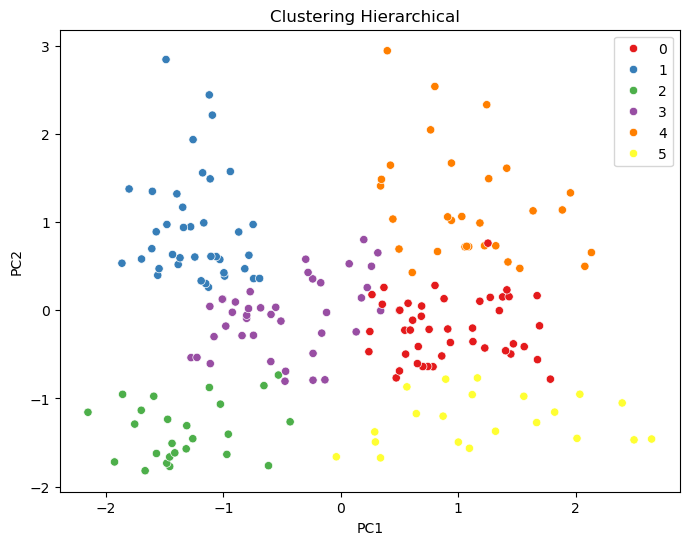

In [35]:
#visualizar los resultados de Hierarchical Clustering 
plt.figure(figsize =(8,6))
sns.scatterplot(x='PC1', y='PC2', hue =kmeans_labels, palette = 'Set1', data = data_pca)
plt.title("Clustering Hierarchical  ")
plt.show() 